In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats


In [2]:
df =pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


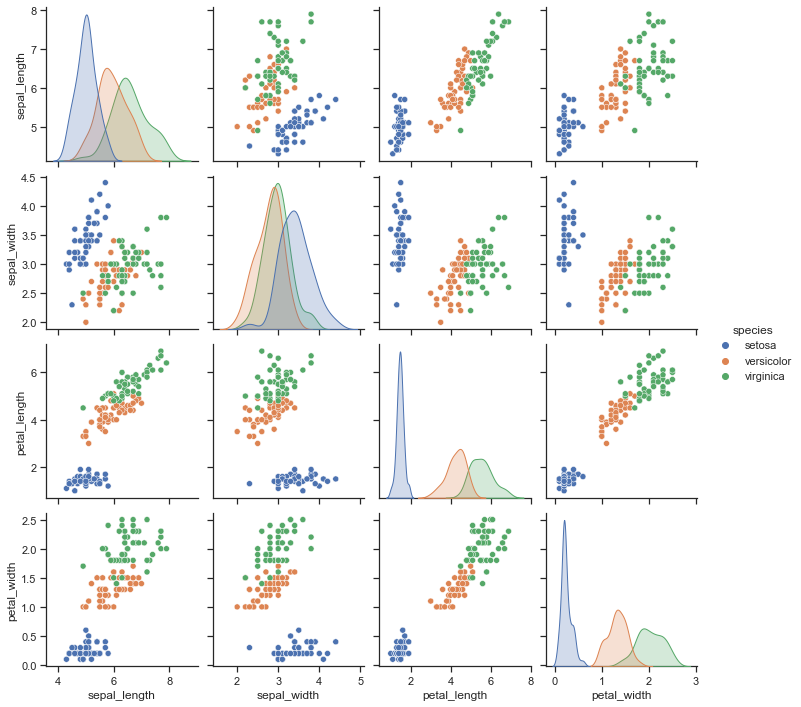

In [6]:
sns.pairplot(df, hue="species");

In [7]:
X = df.iloc[:,0:4] # select all rows and first 8 columns which are the attributes
Y = df[['species']]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [8]:
X_train.head()


,sepal_length,sepal_width,petal_length,petal_width
49,5.0,3.3,1.4,0.2
65,6.7,3.1,4.4,1.4
62,6.0,2.2,4.0,1.0
111,6.4,2.7,5.3,1.9
29,4.7,3.2,1.6,0.2


In [9]:
y_train

,species
49,setosa
65,versicolor
62,versicolor
111,virginica
29,setosa
...,...
142,virginica
92,versicolor
103,virginica
67,versicolor


In [10]:
# Fit the model on original data i.e.
model = LogisticRegression(solver="liblinear", multi_class='auto')
model.fit(X_train, y_train)



LogisticRegression(solver='liblinear')

In [11]:
ytrain_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)


0.9714285714285714


In [12]:
print(confusion_matrix(y_train, ytrain_predict))


[[38  0  0]
 [ 0 31  3]
 [ 0  0 33]]


In [13]:
# Predict probabilities
probs_y=model.predict_proba(X_train)
### Print results 
probs_y = np.round(probs_y, 3)
#probs_y

In [14]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       1.00      0.91      0.95        34
   virginica       0.92      1.00      0.96        33

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [15]:
ytest_predict = model.predict(X_test)
model_score1 = model.score(X_test, y_test)
print(model_score1)

0.8888888888888888


In [16]:
print(confusion_matrix(y_test, ytest_predict))


[[12  0  0]
 [ 0 12  4]
 [ 0  1 16]]


In [17]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.75      0.83        16
   virginica       0.80      0.94      0.86        17

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



## Linear Discriminant Analysis Model

We will now build a LDA model. The model has following parameters:

*Solver:*
* svd: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
* lsqr: Least squares solution. Can be combined with shrinkage or custom covariance estimator.
* eigen: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.

*shrinkage‘auto’ or float, default=None*

This should be left to None if covariance_estimator is used. Note that shrinkage works only with ‘lsqr’ and ‘eigen’ solvers.

*priors: array-like of shape (n_classes,), default=None*

The class prior probabilities. By default, the class proportions are inferred from the training data.

*n_components, default=None*

Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features). This parameter only affects the transform method.

*store_covariance, default=False*

If True, explicitely compute the weighted within-class covariance matrix when solver is ‘svd’. The matrix is always computed and stored for the other solvers.

*tol, default=1.0e-4*

Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X. Dimensions whose singular values are non-significant are discarded. Only used if solver is ‘svd’.

*covariance_estimator: covariance estimator, default=None*

If not None, covariance_estimator is used to estimate the covariance matrices instead of relying on the empirical covariance estimator (with potential shrinkage). The object should have a fit method and a covariance_ attribute like the estimators in sklearn.covariance. if None the shrinkage parameter drives the estimate.

In [44]:
model_LDA = LinearDiscriminantAnalysis(solver="lsqr")
model_LDA.fit(X_train, y_train)
 

LinearDiscriminantAnalysis(solver='lsqr')

In [45]:
#Predicting value of IRIS species
# Predict it
pred_class_LDA = model_LDA.predict(X)
df['Prediction_LDA'] = pred_class_LDA


In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Prediction_LDA
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [46]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class_LDA)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

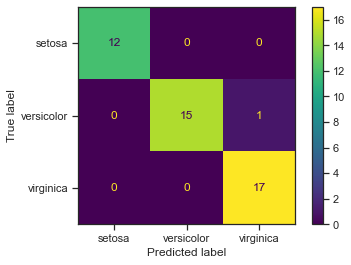

In [22]:
plot_confusion_matrix(model_LDA,X_test,y_test);

In [47]:
model_score2 = model_LDA.score(X_test, y_test)
print(model_score2)

0.9777777777777777


In [24]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.75      0.83        16
   virginica       0.80      0.94      0.86        17

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



In [25]:
model_LDA.coef_

array([[ 21.50810923,  24.06637516, -14.06782261, -17.65206437],
       [ 15.52546911,   6.46215718,   4.48182753,  13.07043598],
       [ 12.14457941,   3.71676008,  12.44763983,  31.90658299]])

In [26]:
Coeff = pd.DataFrame(data=model_LDA.coef_, columns=list(X_train.columns), index=model_LDA.classes_)
Coeff

,sepal_length,sepal_width,petal_length,petal_width
setosa,21.508109,24.066375,-14.067823,-17.652064
versicolor,15.525469,6.462157,4.481828,13.070436
virginica,12.144579,3.716760,12.447640,31.906583


In [27]:
#model_LDA.explained_variance_ratio_ #Can be used if you have svd or eigen solver only

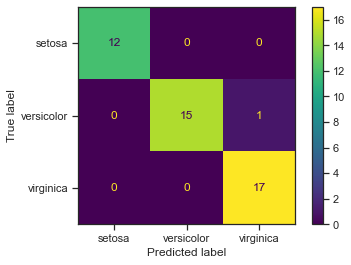

In [48]:
model_LDA_SVD = LinearDiscriminantAnalysis(solver="svd")
model_LDA_SVD.fit(X_train, y_train)
plot_confusion_matrix(model_LDA_SVD,X_test,y_test);

In [29]:
model_score3 = model_LDA_SVD.score(X_test, y_test)
print(model_score3)

0.9777777777777777


In [30]:
Coeff1 = pd.DataFrame(data=model_LDA_SVD.coef_, columns=list(X_train.columns), index=model_LDA_SVD.classes_)
Coeff1

,sepal_length,sepal_width,petal_length,petal_width
setosa,4.740629,11.750407,-13.930271,-24.794561
versicolor,-1.071078,-5.350834,4.089390,5.050153
virginica,-4.355371,-8.017791,11.827607,23.348125


In [31]:
model_LDA_SVD.explained_variance_ratio_ #Can be used if you have svd or eigen solver only

array([0.98791222, 0.01208778])

In the LDA model **model_LDA_SVD**, 98.79% separation is achieved by the first Linear Discriminant function and 1.2% separation is acheived by the second discriminant function.

In [32]:
X_r2 = model_LDA_SVD.fit(X, Y).transform(X)


In [33]:
data1 = {'LD1': X_r2[:,0], 'LD2': X_r2[:,1], 'species':df.species}
df_LDA = pd.DataFrame (data = data1)
df_LDA.head()


,LD1,LD2,species
0,8.084953,0.328454,setosa
1,7.147163,-0.755473,setosa
2,7.511378,-0.238078,setosa
3,6.837676,-0.642885,setosa
4,8.157814,0.540639,setosa


In [49]:
df_LDA.info()
df_LDA.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LD1      150 non-null    float64
 1   LD2      150 non-null    float64
 2   species  150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


,LD1,LD2
count,1.500000e+02,1.500000e+02
mean,2.546111e-16,-2.486900e-16
std,5.729342e+00,1.122684e+00
min,-9.188293e+00,-2.616934e+00
25%,-5.048209e+00,-7.861146e-01
50%,-1.829544e+00,-8.263230e-02
75%,6.938536e+00,6.931525e-01
max,9.869366e+00,2.755586e+00


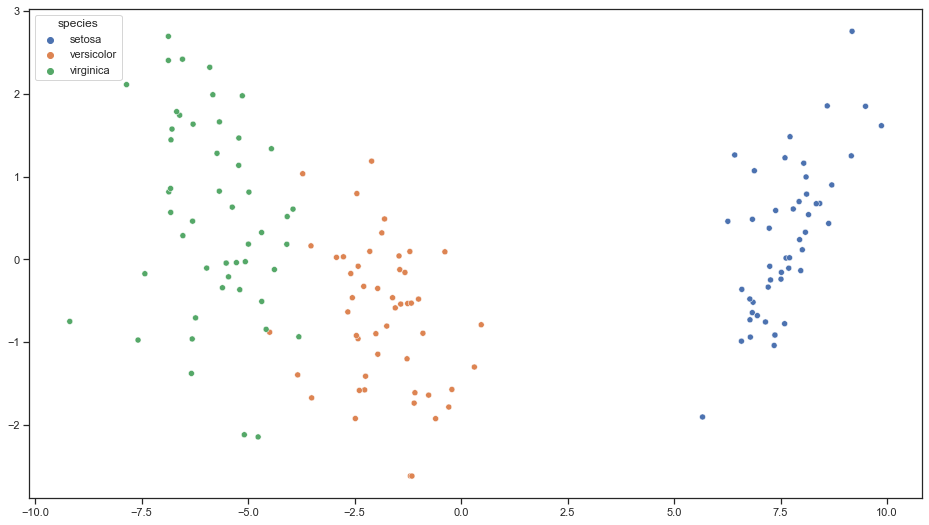

In [35]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=X_r2[:,0],y=X_r2[:,1], hue=df.species)
plt.show()


In [36]:
#Subsetting Dataframe
df_LDA_setosa = df_LDA[df_LDA['species']=='setosa']
df_LDA_versicolor = df_LDA[df_LDA['species']=='versicolor']
df_LDA_virginica = df_LDA[df_LDA['species']=='virginica']



## Creating Histogram plots

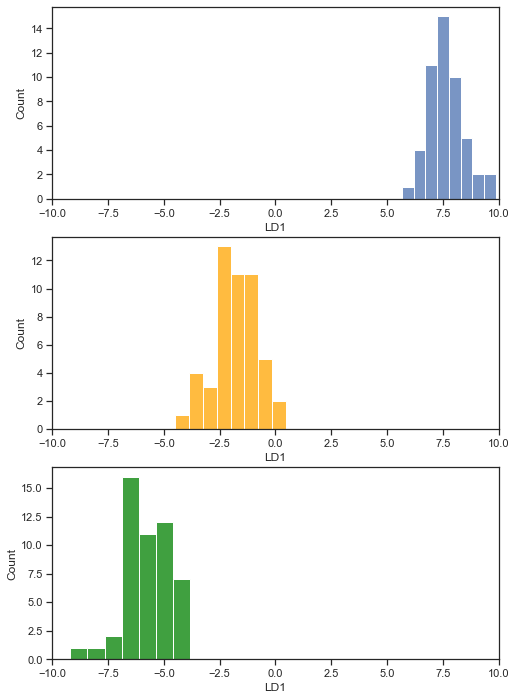

In [37]:
f, axes = plt.subplots(3,1)
f.set_figheight(12)
f.set_figwidth(8)
axes[0].set_xlim(left=-10, right=10)
axes[1].set_xlim(left=-10, right=10)
axes[2].set_xlim(left=-10, right=10)
sns.histplot(df_LDA_setosa.LD1, kde=False, ax=axes[0])
sns.histplot(df_LDA_versicolor.LD1, kde=False,ax=axes[1], color='orange')
sns.histplot(df_LDA_virginica.LD1, kde=False,ax=axes[2], color='green')
plt.show()

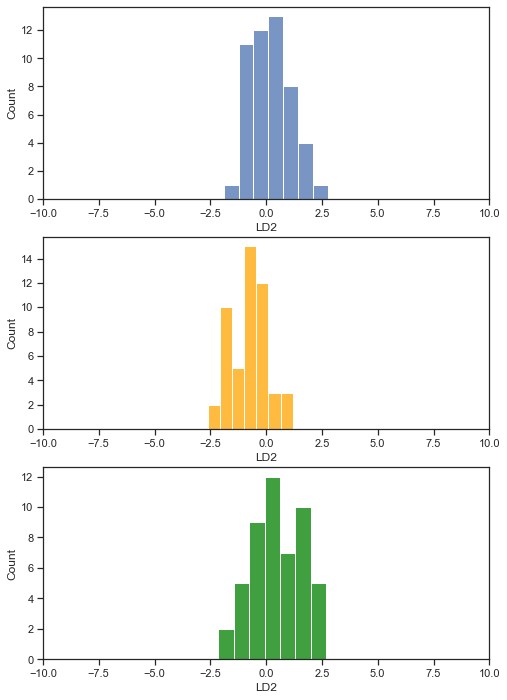

In [38]:
f, axes = plt.subplots(3,1)
f.set_figheight(12)
f.set_figwidth(8)
axes[0].set_xlim(left=-10, right=10)
axes[1].set_xlim(left=-10, right=10)
axes[2].set_xlim(left=-10, right=10)
sns.histplot(df_LDA_setosa.LD2, kde=False, ax=axes[0])
sns.histplot(df_LDA_versicolor.LD2, kde=False,ax=axes[1], color='orange')
sns.histplot(df_LDA_virginica.LD2, kde=False,ax=axes[2], color='green')
plt.show()

In [39]:
#Extracting only numerical variables

iris_num = df.select_dtypes(include = ['float64', 'int64'])

from scipy.stats import zscore
iris_num_scaled=iris_num.apply(zscore)
iris_num_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [40]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

iris_pca = PCA(n_components=4, random_state=123)
df_pca1 = iris_pca.fit_transform(iris_num_scaled)
#df_pca1.transpose() # Component output

In [41]:
iris_new = pd.DataFrame(df_pca1, columns = ['PC1','PC2','PC3','PC4'])
#sns.scatter_plot(x=df.)

iris_comb = pd.concat([iris_new, df.species], axis=1)


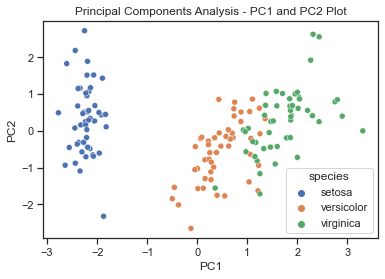

In [42]:
sns.scatterplot(data =iris_comb, x='PC1', y='PC2', hue='species')
plt.title("Principal Components Analysis - PC1 and PC2 Plot")
plt.show()

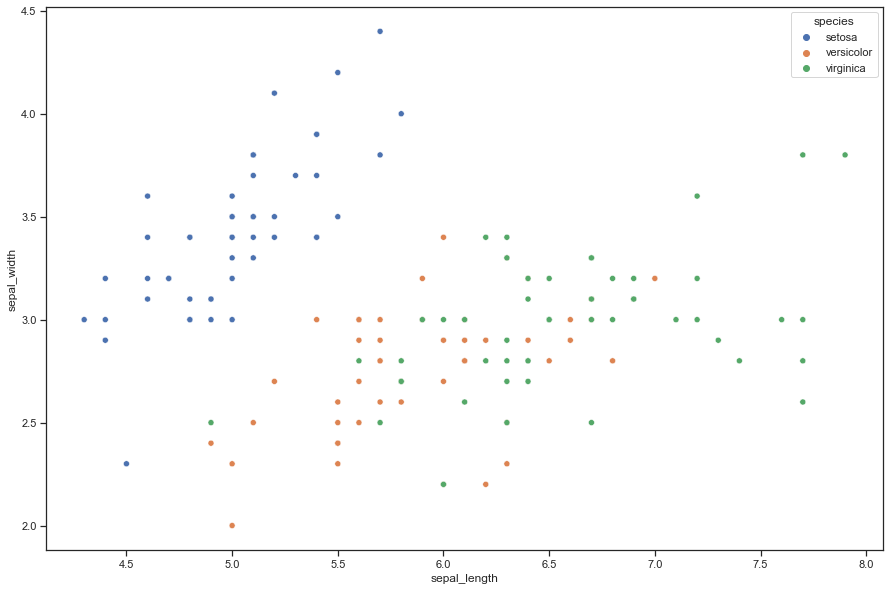

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = df, x=df.sepal_length,y=df.sepal_width, hue='species')
plt.show()